In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    

In [30]:
data = pd.read_csv('USA_Housing.csv')



In [31]:
import seaborn as sns

In [32]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [33]:
# rename columns

data.rename(columns={'Avg. Area Income' : 'Median income', 'Avg. Area House Age': 'Avg House Age', 'Avg. Area Number of Rooms': 'rooms', 'Avg. Area Number of Bedrooms':'bedrooms'}, inplace = True)

In [34]:
data.describe()

,Median income,Avg House Age,rooms,bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


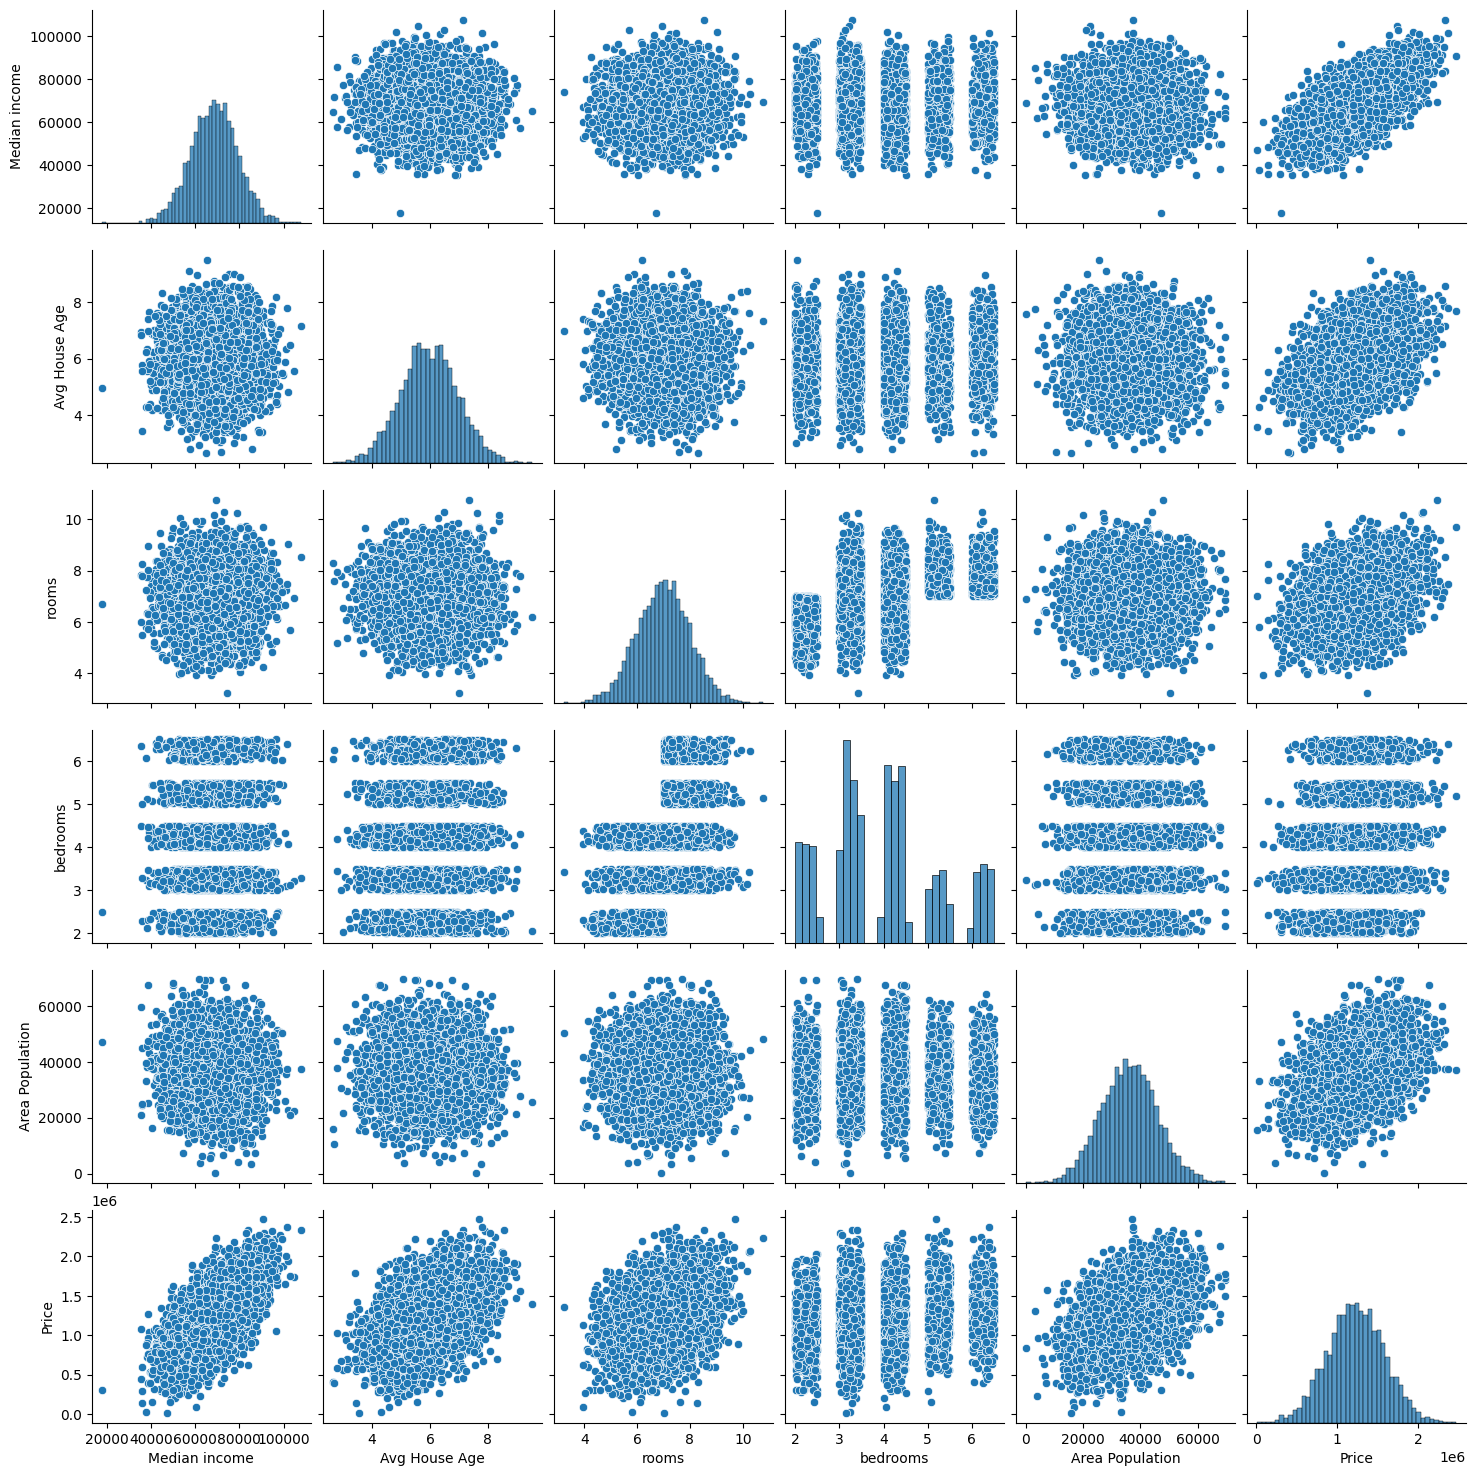

In [35]:
#pairplots for the columns

sns.pairplot (data)

c:\Users\jeevs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

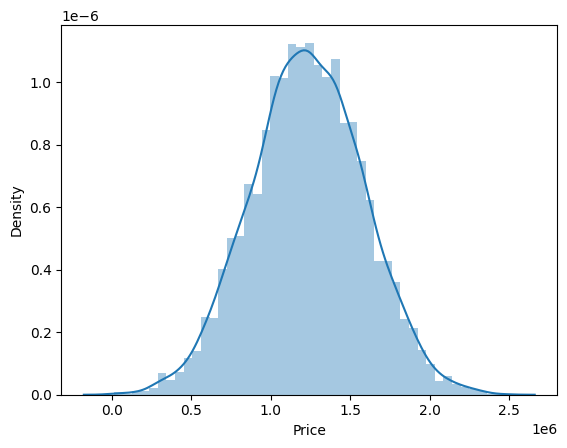

In [36]:
sns.distplot(data['Price'])

In [37]:
data.corr()

,Median income,Avg House Age,rooms,bedrooms,Area Population,Price
Median income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

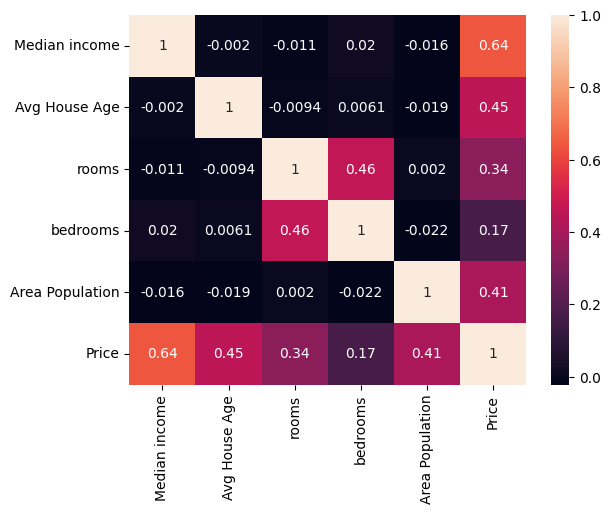

In [38]:
sns.heatmap(data.corr(), annot=True)

In [39]:
data.columns

Index(['Median income', 'Avg House Age', 'rooms', 'bedrooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

In [40]:
X = data[{'Median income', 'Avg House Age', 'rooms', 'bedrooms', 'Area Population'}]
y = data['Price']




C:\Users\jeevs\AppData\Local\Temp\ipykernel_34964\1420074958.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = data[{'Median income', 'Avg House Age', 'rooms', 'bedrooms', 'Area Population'}]


In [43]:
from sklearn.model_selection import train_test_split


#2. split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=101)

In [45]:
#3. import the linear regression model 

from sklearn.linear_model import LinearRegression

#create an instance of Linear Regression class
lm = LinearRegression()

#train my model on my training data

lm.fit(X_train, y_train)



LinearRegression()

In [46]:
lm.intercept_

-2640159.7968515432

In [47]:
lm.coef_

array([2.15282755e+01, 2.23380186e+03, 1.51504200e+01, 1.22368678e+05,
       1.64883282e+05])

In [49]:
cdf = pd.DataFrame ( lm.coef_, X_train.columns, columns=['Coeff'])
cdf

,Coeff
Median income,21.528276
bedrooms,2233.801864
Area Population,15.150420
rooms,122368.678027
Avg House Age,164883.282027


In [50]:
predictions =lm.predict(X_test)

predictions

array([1260960.70567625,  827588.75560362, 1742421.24254321, ...,
        372191.40626969, 1365217.15140893, 1914519.54178798])

In [ ]:
#compare predictions with actual values 

